In [1]:
import pandas as pd
import jaydebeapi
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
url = "jdbc:IRIS://irisimlsvr:1972/USER"
driver = 'com.intersystems.jdbc.IRISDriver'
user = "SUPERUSER"
password = "SYS"
jarfile = "./intersystems-jdbc-3.1.0.jar"

conn = jaydebeapi.connect(driver, url, [user, password], jarfile)
curs = conn.cursor()

In [3]:
columns = "TimeReference,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount"
df = pd.read_sql("SELECT top 1000 %s FROM SQLUser.CreditCard order by ID" % columns, conn)
display(df)

,TimeReference,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,394,-0.5531,1.6676,-0.0474,0.5142,0.5894,-0.6354,1.1266,-0.3119,0.0352,...,0.5777,-0.0335,0.6877,-0.0767,0.0148,-0.5907,-0.4830,0.1377,-0.3349,1.55
1,406,-2.3122,1.9520,-1.6099,3.9979,-0.5222,-1.4265,-2.5374,1.3917,-2.7701,...,0.1269,0.5172,-0.0350,-0.4652,0.3202,0.0445,0.1778,0.2611,-0.1433,0.00
2,406,-1.6450,-2.0908,1.5926,-1.3889,1.7329,-1.6311,-0.9229,0.0138,1.7608,...,0.5642,0.2482,0.4155,0.2933,-0.4634,-0.4052,-0.9241,0.0066,0.0187,46.68
3,407,-0.9181,0.7985,1.7535,-0.5770,-0.5548,0.1195,1.0962,-0.1146,-0.2133,...,-0.2057,0.0507,0.2013,0.0236,0.1074,-0.4645,0.0049,-0.0680,0.0938,146.25
4,408,-2.9908,1.9330,0.4235,-2.0199,-0.1086,-0.2957,0.6297,-0.0450,2.4248,...,1.2989,-0.5727,-0.3252,0.1543,-0.3315,0.2346,0.7601,0.9554,0.5365,7.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,34635,1.0716,0.1234,0.4999,1.3393,-0.1872,0.0334,0.0140,0.0967,-0.0265,...,-0.1308,-0.0221,0.1075,-0.0695,0.2407,0.6080,-0.3452,0.0347,0.0116,27.00
996,34635,-0.4385,0.8767,1.1958,-0.3857,0.5054,0.3561,0.4610,0.3136,-0.4911,...,0.0552,-0.2117,-0.5802,-0.0986,-0.8479,-0.2116,0.1372,0.2721,0.0974,3.08
997,34636,-0.7554,1.2851,1.6526,1.5203,0.7006,0.1706,0.6981,0.2579,-1.0049,...,-0.1805,-0.0404,-0.0611,-0.3914,-0.1096,0.3492,-0.0754,0.0684,0.1051,0.76
998,34637,-1.9378,-0.4442,1.2730,3.0138,-0.7668,2.2268,2.5023,-0.4493,-0.2891,...,0.1071,-0.5296,0.1258,0.4378,-0.2795,-0.2039,0.1457,0.5338,-0.4225,510.68


In [4]:
maximun = 100
df = pd.read_sql('SELECT %s FROM SQLUser.CreditCard where amount <= %s' % (columns, maximun), conn)
df['Amount'].describe()

count    4283.000000
mean       24.272837
std        27.406399
min         0.000000
25%         2.690000
50%        12.440000
75%        36.260000
max       100.000000
Name: Amount, dtype: float64

In [5]:
train_set = df.sample(n=375, random_state=1984)
test_set = df.sample(n=125, random_state=1984)

In [6]:
list_ids = train_set.index.tolist()
curs.execute(
    'CREATE OR REPLACE VIEW SQLUser.AmountEstimationTrain AS \
     SELECT %s FROM SQLUser.CreditCard WHERE ID IN (%s) and amount <= %s' % (columns, str(list_ids).strip('[]'), maximun))

list_ids = test_set.sample(n=125, random_state=1984).index.tolist()
curs.execute(
    'CREATE OR REPLACE VIEW SQLUser.AmountEstimationTest AS \
     SELECT %s FROM SQLUser.CreditCard WHERE ID IN (%s) and amount <= %s' % (columns, str(list_ids).strip('[]'), maximun))

In [7]:
df = pd.read_sql('SELECT * FROM SQLUser.AmountEstimationTrain', conn)
df['Amount'].describe()

count    307.000000
mean      24.336482
std       27.925684
min        0.000000
25%        1.985000
50%       12.990000
75%       33.705000
max      100.000000
Name: Amount, dtype: float64

(array([79., 14., 11., 11., 19., 14.,  8., 13., 11.,  7.,  7.,  8., 10.,
         4.,  9.,  5.,  0.,  1.,  6.,  5.,  0.,  3.,  4.,  2.,  3.,  2.,
         1.,  0.,  0.,  2.,  3.,  2.,  3.,  0.,  6.,  2.,  0.,  4.,  4.,
         3.,  2.,  0.,  0.,  1.,  4.,  2.,  1.,  1.,  2.,  8.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

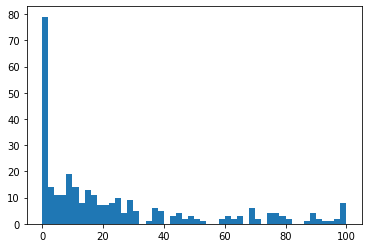

In [8]:
plt.hist(df['Amount'], bins=50)

In [9]:
df = pd.read_sql('SELECT * FROM SQLUser.AmountEstimationTest', conn)
df['Amount'].describe()

count    104.000000
mean      24.509423
std       28.956804
min        0.000000
25%        1.980000
50%       13.800000
75%       32.587500
max      100.000000
Name: Amount, dtype: float64

(array([29.,  5.,  4.,  1.,  6.,  4.,  3.,  6.,  4.,  4.,  3.,  2.,  3.,
         1.,  1.,  2.,  0.,  0.,  2.,  1.,  0.,  1.,  1.,  1.,  1.,  2.,
         0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  2.,  2.,  0.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  5.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

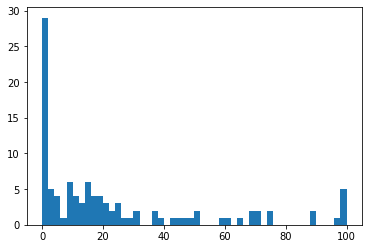

In [10]:
plt.hist(df['Amount'], bins=50)

In [11]:
try:
    curs.execute("DROP MODEL AmountEstimationModel")
except Exception as e:
    print('No previous model detected')
curs.execute("CREATE MODEL AmountEstimationModel PREDICTING (Amount) FROM SQLUser.AmountEstimationTrain")
print('Training model (this could take a while)...')
curs.execute("TRAIN MODEL AmountEstimationModel")
print('Model trained')

Training model (this could take a while)...
Model trained


In [12]:
display(pd.read_sql("SELECT * FROM INFORMATION_SCHEMA.ML_TRAINED_MODELS", conn))

,MODEL_NAME,TRAINED_MODEL_NAME,PROVIDER,TRAINED_TIMESTAMP,MODEL_TYPE,MODEL_INFO
0,LoanEstimationModel,LoanEstimationModel_t1,AutoML,2020-11-17 22:51:24.820000,regression,"ModelType:Boosted Tree Regression, Package:XGB..."
1,CredCardFraudModel,CredCardFraudModel_t1,AutoML,2020-11-18 01:00:40.753000,classification,"ModelType:Random Forest, Package:sklearn, Prob..."
2,AmountEstimationModel,AmountEstimationModel_t1,AutoML,2020-11-18 01:01:32.888000,regression,"ModelType:Boosted Tree Regression, Package:XGB..."


In [13]:
df = pd.read_sql("SELECT \
                  PREDICT(AmountEstimationModel) AS PredictedResponse, \
                  Amount AS ActualResponse FROM SQLUser.AmountEstimationTest", conn)

In [14]:
df.head()

,PredictedResponse,ActualResponse
0,21.162386,21.00
1,1.082581,0.89
2,7.510467,1.79
3,6.492053,1.98
4,24.709703,19.36


In [15]:
df.tail()

,PredictedResponse,ActualResponse
99,48.553997,69.00
100,32.595207,44.99
101,59.366123,65.54
102,21.189651,17.95
103,40.446915,38.00


In [16]:
curs.execute("VALIDATE MODEL AmountEstimationModel FROM SQLUser.AmountEstimationTest")
df = pd\
    .read_sql("SELECT * FROM INFORMATION_SCHEMA.ML_VALIDATION_METRICS", conn)\
    .pivot(index='VALIDATION_RUN_NAME', columns='METRIC_NAME', values='METRIC_VALUE')
display(df)

METRIC_NAME,Accuracy,F-Measure,MSE,Precision,R2,RMSE,Recall,Variance
VALIDATION_RUN_NAME,,,,,,,,
AmountEstimationModel_t1_v1,NaN,NaN,199.59,NaN,0.76,14.13,NaN,830.43
CredCardFraudModel_t1_v1,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN
LoanEstimationModel_t1_v1,NaN,NaN,1832.25,NaN,0.93,42.80,NaN,26819.61
LoanEstimationModel_t1_v2,NaN,NaN,1832.25,NaN,0.93,42.80,NaN,26819.61


In [17]:
curs.close()
conn.close()